<a href="https://colab.research.google.com/github/keerthana202/Portfolio/blob/main/Copy_of_Dataset_1_week3_Keerthana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("/content/Data-cleaning-for-beginners-using-pandas.csv")
data

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1
5,5,44.0,$77k-$89k,1.4,"India,In",1999,TRUE
6,6,21.0,$44k-$99k,0.0,"New York,Ny",-1,-1
7,7,44.0,$44k-$99k,-1.0,Australia Aus,-1,-1
8,8,35.0,$44k-$99k,5.4,"New York,Ny",-1,-1
9,9,22.0,$44k-$99k,7.7,"India,In",-1,TRUE


Missing values

In [5]:
data.isnull().sum()

Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

In [6]:
data.columns

Index(['Index', 'Age', 'Salary', 'Rating', 'Location', 'Established',
       'Easy Apply'],
      dtype='object')

In [7]:
avg_age = data['Age'].median()
avg_age

39.5

In [8]:
data['Age']=data.Age.fillna(avg_age)
data['Age']=data.Age.round(decimals=0).astype(int)
data.head(2)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66,$55k-$66k,3.5,"New York,Ny",2002,TRUE


In [9]:
data.loc[data['Rating'] <= 0, 'Rating'] = np.nan

avg_rate=data['Rating'].median()
avg_rate

5.3

In [10]:
data['Rating']=data['Rating'].fillna(avg_rate)
data['Rating']=data['Rating'].round(decimals=1)
data.head(2)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66,$55k-$66k,3.5,"New York,Ny",2002,TRUE


Data Types


In [11]:
data.dtypes

Index            int64
Age              int64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object

Salary Formatting:

In [12]:
data['Salary']=data.Salary.str.replace("$","")
data['Salary']=data.Salary.str.replace("k","000")
data.head(1)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44,44000-99000,5.4,"India,In",1999,TRUE


In [13]:
data['AVG_Salary'] = data['Salary'].str.split('-', expand=True).astype(float).mean(axis=1).astype(int)

column_order = ['Index', 'Age', 'AVG_Salary', 'Salary'] + [col for col in data.columns if col not in ['Index', 'Age', 'AVG_Salary', 'Salary']]
data = data[column_order]

data.head()



,Index,Age,AVG_Salary,Salary,Rating,Location,Established,Easy Apply
0,0,44,71500,44000-99000,5.4,"India,In",1999,TRUE
1,1,66,60500,55000-66000,3.5,"New York,Ny",2002,TRUE
2,2,40,83000,77000-89000,5.3,"New York,Ny",-1,-1
3,3,64,71500,44000-99000,4.4,India In,1988,-1
4,4,25,71500,44000-99000,6.4,Australia Aus,2002,-1


Location Standardization:

In [14]:
data['Location'] = data['Location'].str.split(',').str[0]
data['Location'] = data['Location'].str.replace(" Aus","")
data['Location'] = data['Location'].str.replace(" In","")
data.head(2)

,Index,Age,AVG_Salary,Salary,Rating,Location,Established,Easy Apply
0,0,44,71500,44000-99000,5.4,India,1999,TRUE
1,1,66,60500,55000-66000,3.5,New York,2002,TRUE


In [15]:
data.isnull().sum()

Index          0
Age            0
AVG_Salary     0
Salary         0
Rating         0
Location       0
Established    0
Easy Apply     0
dtype: int64

Established Column

In [16]:
data.loc[data['Established']<=0,'Established']=np.nan

avg_yr = data['Established'].median()
avg_yr

1988.0

In [17]:
data['Established']=data['Established'].fillna(avg_yr)
data['Established']=data['Established'].astype(int)
data.head(2)

,Index,Age,AVG_Salary,Salary,Rating,Location,Established,Easy Apply
0,0,44,71500,44000-99000,5.4,India,1999,TRUE
1,1,66,60500,55000-66000,3.5,New York,2002,TRUE


Easy Apply Indicator

In [18]:
data['Easy Apply']=data['Easy Apply'].str.replace("-1","FALSE")
data.head(2)

,Index,Age,AVG_Salary,Salary,Rating,Location,Established,Easy Apply
0,0,44,71500,44000-99000,5.4,India,1999,TRUE
1,1,66,60500,55000-66000,3.5,New York,2002,TRUE


Rating range

Summary Statistics of Rating:
count    29.000000
mean      5.006897
std       1.437242
min       1.400000
25%       4.400000
50%       5.300000
75%       5.400000
max       7.800000
Name: Rating, dtype: float64


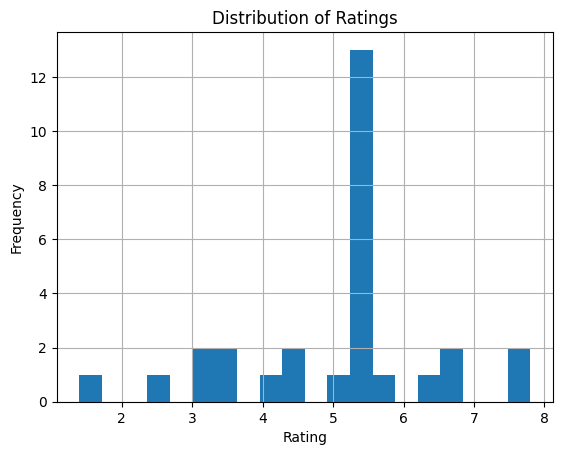

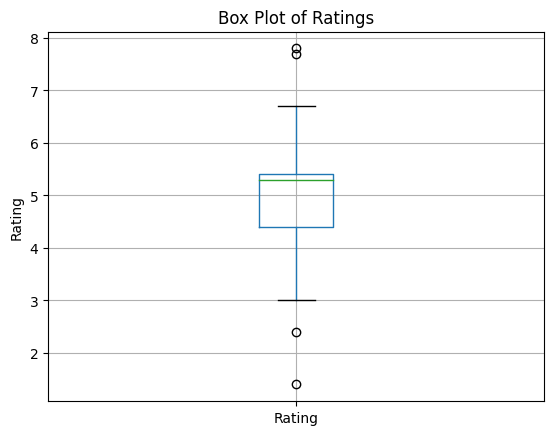

,Index,Age,AVG_Salary,Salary,Rating,Location,Established,Easy Apply
0,0,44,71500,44000-99000,5.0,India,1999,TRUE
1,1,66,60500,55000-66000,3.5,New York,2002,TRUE
2,2,40,83000,77000-89000,5.0,New York,1988,FALSE
3,3,64,71500,44000-99000,4.4,India,1988,FALSE
4,4,25,71500,44000-99000,5.0,Australia,2002,FALSE


In [19]:
import matplotlib.pyplot as plt  # Import the pyplot module

rating_summary = data['Rating'].describe()
print("Summary Statistics of Rating:")
print(rating_summary)

data['Rating'].hist(bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


data.boxplot(column='Rating')
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
plt.show()


median_rating = data['Rating'].median()
data['Rating'] = data['Rating'].clip(lower=0, upper=5)

data.head()


Age Distribution

Summary Statistics of Age:
count    29.000000
mean     39.275862
std      13.979313
min      13.000000
25%      32.000000
50%      40.000000
75%      44.000000
max      66.000000
Name: Age, dtype: float64


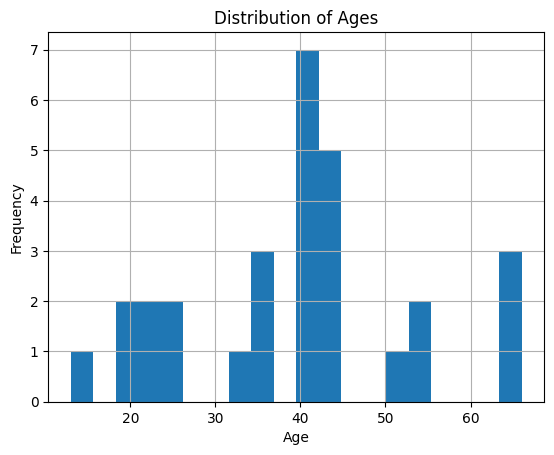

Unusual Entries in Age Column:
Empty DataFrame
Columns: [Index, Age, AVG_Salary, Salary, Rating, Location, Established, Easy Apply]
Index: []


In [20]:
import matplotlib.pyplot as plt

age_summary = data['Age'].describe()
print("Summary Statistics of Age:")
print(age_summary)

data['Age'].hist(bins=20)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

unusual_entries = data[data['Age'] < 0]
print("Unusual Entries in Age Column:")
print(unusual_entries)



 Easy Apply Transformation

In [21]:
data['Easy Apply'] = data['Easy Apply'].replace({'TRUE': True , 'FALSE': False})

data.head()



,Index,Age,AVG_Salary,Salary,Rating,Location,Established,Easy Apply
0,0,44,71500,44000-99000,5.0,India,1999,True
1,1,66,60500,55000-66000,3.5,New York,2002,True
2,2,40,83000,77000-89000,5.0,New York,1988,False
3,3,64,71500,44000-99000,4.4,India,1988,False
4,4,25,71500,44000-99000,5.0,Australia,2002,False


In [22]:
data.dtypes

Index            int64
Age              int64
AVG_Salary       int64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply        bool
dtype: object

**FINAL DATA TABLE :**




In [23]:
data.to_csv("/content/Cleaned-Data-using-pandas.csv", sep=',')
data

,Index,Age,AVG_Salary,Salary,Rating,Location,Established,Easy Apply
0,0,44,71500,44000-99000,5.0,India,1999,True
1,1,66,60500,55000-66000,3.5,New York,2002,True
2,2,40,83000,77000-89000,5.0,New York,1988,False
3,3,64,71500,44000-99000,4.4,India,1988,False
4,4,25,71500,44000-99000,5.0,Australia,2002,False
5,5,44,83000,77000-89000,1.4,India,1999,True
6,6,21,71500,44000-99000,5.0,New York,1988,False
7,7,44,71500,44000-99000,5.0,Australia,1988,False
8,8,35,71500,44000-99000,5.0,New York,1988,False
9,9,22,71500,44000-99000,5.0,India,1988,True


In [24]:
from google.colab import files

files.download("/content/Cleaned-Data-using-pandas.csv")
data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Index,Age,AVG_Salary,Salary,Rating,Location,Established,Easy Apply
0,0,44,71500,44000-99000,5.0,India,1999,True
1,1,66,60500,55000-66000,3.5,New York,2002,True
2,2,40,83000,77000-89000,5.0,New York,1988,False
3,3,64,71500,44000-99000,4.4,India,1988,False
4,4,25,71500,44000-99000,5.0,Australia,2002,False
5,5,44,83000,77000-89000,1.4,India,1999,True
6,6,21,71500,44000-99000,5.0,New York,1988,False
7,7,44,71500,44000-99000,5.0,Australia,1988,False
8,8,35,71500,44000-99000,5.0,New York,1988,False
9,9,22,71500,44000-99000,5.0,India,1988,True
